In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers,models,optimizers,preprocessing,losses 

2024-07-24 19:50:42.936180: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 19:50:42.936308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 19:50:43.119015: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/val'

In [4]:
img_height=256
img_width=256
batch_size=64

In [5]:
train_ds=tensorflow.keras.preprocessing.image_dataset_from_directory(
train_dir,
color_mode='grayscale',
image_size=(img_height,img_width),
batch_size=batch_size
)
test_ds=tensorflow.keras.preprocessing.image_dataset_from_directory(
test_dir,
color_mode='grayscale',
image_size=(img_height,img_width),
batch_size=batch_size
)
val_ds=tensorflow.keras.preprocessing.image_dataset_from_directory(
val_dir,
color_mode='grayscale',
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [6]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis('on')


In [ ]:
AUTOTUNE =tf.data.experimental.AUTOTUNE

train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1.0/255),
    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(265,activation='relu'),
    layers.Dense(2,activation='sigmoid')
    
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1
         )

/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


82/82 ━━━━━━━━━━━━━━━━━━━━ 1754s 21s/step - accuracy: 0.7080 - loss: 0.7530 - val_accuracy: 0.9528 - val_loss: 0.1594


In [12]:
model.evaluate(test_ds)

82/82 ━━━━━━━━━━━━━━━━━━━━ 420s 5s/step - accuracy: 0.9553 - loss: 0.1559


[0.1593610644340515, 0.9528374075889587]

In [13]:
history.history

{'accuracy': [0.8050230145454407],
 'loss': [0.45604705810546875],
 'val_accuracy': [0.9528374075889587],
 'val_loss': [0.1593610644340515]}

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 265)            │    30,528,265 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           532 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,475,737 (352.77 MB)

 Trainable params: 30,825,245 (117.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,650,492 (235.18 MB)

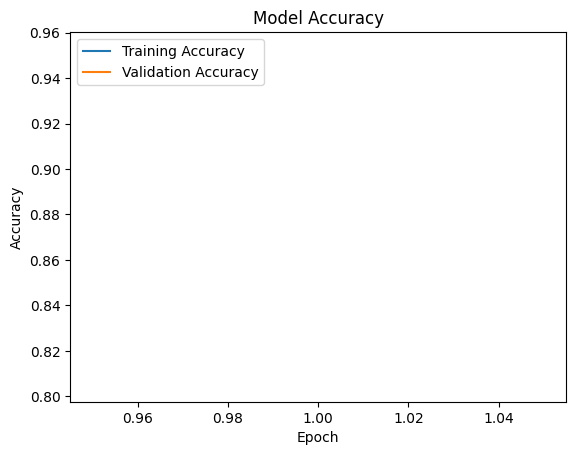

In [24]:
import matplotlib.pyplot as plt

def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

# Pass the history object and the number of epochs to the function
plot_learningCurve(history, epochs=1)


In [ ]:
model.save("model.h5")

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 1. Preprocess the new image
def preprocess_image(image_path):
    img = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# 2. Load the trained model
model = load_model("/content/model.h5")

# 3. Make predictions
new_image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
new_image = preprocess_image(new_image_path)
prediction = model.predict(new_image)

# Assuming binary classification (infected or uninfected)
threshold = 0.5
result = "Infected" if prediction > threshold else "Uninfected"

print(f"The image is classified as: {result}")